In [1]:
import numpy as np 
import pandas as pd
import os
import glob
import fnmatch
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import ruptures as rpt


In [2]:
from lib.data_classes.pffpFolder import pffpDataFolder
from lib.signal_processing.signal_function import moving_average, find_deriv_change, find_drops
from lib.general_functions.global_constants import GRAVITY_CONST
from lib.general_functions.general_function import convert_time_units


In [3]:
# Testing the binary file classa
#TODO: for some reason I need the full path to read the files, I'll need to look into this in the future
# folder_dir = r"C:\Geotech_Research\Field_Analysis\BlueDrop_Analysis_Lib\test"
# folder_dir = r"C:\Geotech_Research\Field_Analysis\BlueDrop_Analysis_Lib\Mouth 1" #pffp 3, sequim 2023
# folder_dir = r"/home/sandbiter/Documents/BlueDrop_Analysis_Lib/Potomac_to Jonathan"
# folder_dir = r"/home/sandbiter/Documents/BlueDrop_Analysis_Lib/test_folder"
# folder_dir = r"C:\Geotech_Research\Field_Analysis\BlueDrop_Analysis_Lib\Clay_Air_Drops_GBE_AdamsPoint"
# folder_dir = r"/home/sandbiter/Documents/BlueDrop_Analysis_Lib/Mouth_1"
# folder_dir = r"/home/sandbiter/Documents/BlueDrop_Analysis_Lib/Clay_Air_Drops_GBE_AdamsPoint"
folder_dir = r"C:\Geotech_Research\Field_Analysis\BlueDrop_Analysis_Lib\stark_drops"
# folder_dir = r"C:\Geotech_Research\Field_Analysis\BlueDrop_Analysis_Lib\Clay_air_drops\Clay_Air" #1, march 2023
calibration_dir = r"BlueDrop_Calibration_Factors.xlsx"

In [4]:
# TODO: Combine the pffp_id and the read_calibration_excel_sheet just have the objet call inside
name = "test"
id = 9
test_folder = pffpDataFolder(folder_dir, pffp_id = id, calibration_factor_dir=calibration_dir, survey_name = name)
print(test_folder)

Folder: C:\Geotech_Research\Field_Analysis\BlueDrop_Analysis_Lib\stark_drops 
Date range: Not set 
PFFP id: 9                 
Calibration Param dir: BlueDrop_Calibration_Factors.xlsx 
Num .bin files: Not set                 
Num files with drops: Not Set


In [5]:
# Read the calibration data
test_folder.read_calibration_excel_sheet()
test_folder.calibration_excel_sheet

# Select the specific calibration params
if id == 3:
    test_folder.get_sensor_calibration_params("Sequim_2021")
elif id == 1:
    test_folder.get_sensor_calibration_params("March_2023")
elif id ==9:
    test_folder.get_sensor_calibration_params("October_2023")
else:
    raise ValueError("not a valid pffp id")

# Init a pffpFile instances for each binary file and store the results in the folder
test_folder.store_pffp_files(recursive = True)

print(test_folder) # Information about the folder

['C:\\Geotech_Research\\Field_Analysis\\BlueDrop_Analysis_Lib\\stark_drops\\funky\\bLog0C21.bin', 'C:\\Geotech_Research\\Field_Analysis\\BlueDrop_Analysis_Lib\\stark_drops\\funky\\bLog0C25.bin', 'C:\\Geotech_Research\\Field_Analysis\\BlueDrop_Analysis_Lib\\stark_drops\\funky\\bLog0C33.bin']
Folder: C:\Geotech_Research\Field_Analysis\BlueDrop_Analysis_Lib\stark_drops 
Date range: Not set 
PFFP id: 9                 
Calibration Param dir: BlueDrop_Calibration_Factors.xlsx 
Num .bin files: 3                 
Num files with drops: Not Set


In [6]:
# Analyze the selected pffp files
test_folder.analyze_all_files(store_df=False, use_pore_pressure=True, select_accel=["2g_accel", "18g_accel", "50g_accel", "250g_accel"], debug = False)


Folder 'C:\Geotech_Research\Field_Analysis\BlueDrop_Analysis_Lib\stark_drops\no_drop_folder' already exists.
Folder 'C:\Geotech_Research\Field_Analysis\BlueDrop_Analysis_Lib\stark_drops\funky' already exists.

Progress finding files with drops...
[==================================================] 100.00% ETA (min): 0.08
Initial analysis complete!


In [7]:
print(test_folder)

Folder: C:\Geotech_Research\Field_Analysis\BlueDrop_Analysis_Lib\stark_drops 
Date range: Not set 
PFFP id: 9                 
Calibration Param dir: BlueDrop_Calibration_Factors.xlsx 
Num .bin files: 3                 
Num files with drops: 3


In [8]:
test_folder.process_drop_files()


Progress processing drops in files...
Release not found 
<class 'lib.data_classes.exceptions.zeroLenError'>

Point meeting criteria not found
Criteria not met: peak before impulse (release point)
drop id: 1 in bLog0C21.bin
Moving file to funky folder
C:\Geotech_Research\Field_Analysis\BlueDrop_Analysis_Lib\stark_drops\funky\bLog0C21.bin already exists in C:\Geotech_Research\Field_Analysis\BlueDrop_Analysis_Lib\stark_drops\funky
[=================================-----------------] 66.67% ETA (min): 1.7e-08Release not found 
<class 'lib.data_classes.exceptions.zeroLenError'>

Point meeting criteria not found
Criteria not met: peak before impulse (release point)
drop id: 1 in bLog0C33.bin
Moving file to funky folder
C:\Geotech_Research\Field_Analysis\BlueDrop_Analysis_Lib\stark_drops\funky\bLog0C33.bin already exists in C:\Geotech_Research\Field_Analysis\BlueDrop_Analysis_Lib\stark_drops\funky
[==================================================] 100.00% ETA (min): 1.7e-08

File Directory: C:\Geotech_Research\Field_Analysis\BlueDrop_Analysis_Lib\stark_drops\funky\bLog0C21.bin 
Num Drops in file: 3         
Drop Date: 2024-04-24 
Drop Time: 20:00:54.970967         
df stored: False        
Concat accel stored: True


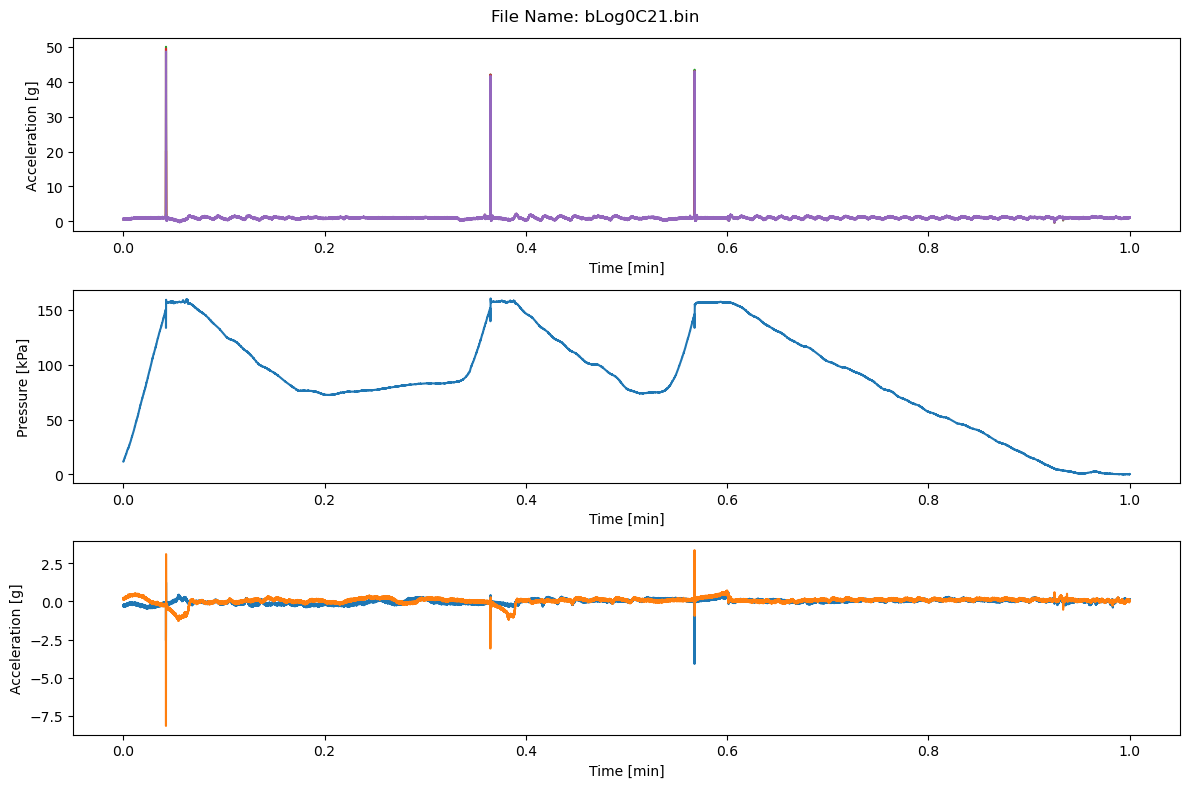

In [9]:
print(test_folder.pffp_funky_files[0])
test_folder.pffp_funky_files[0].quick_view()

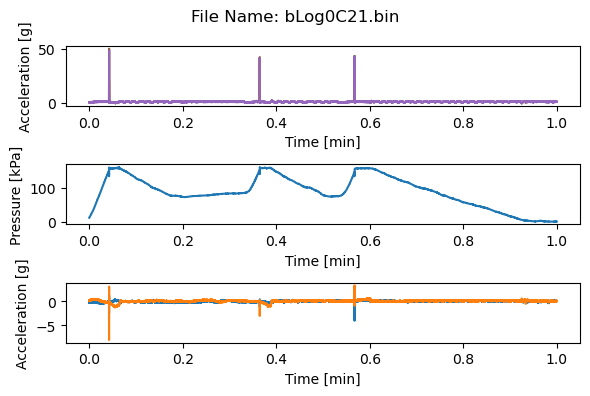

----- Drop Info ----- 
Containing file: bLog0C21.bin 
File Drop Index: 1 
Water Drop: None            
Drop indices: {'release_index': None, 'start_impulse_index': 5065, 'end_impulse_index': 5122}
Need release_index 
 is not an allowed input. Only Time, index or skip is allowed

Escaping from function
None


In [55]:
def process_funky_files(folder, file, debug = False, interactive = True, figsize = [12,8], legend = False):
    # Purpose: Manually process funky files
    # Plot the data
    file.quick_view(interactive=interactive, figsize= figsize, legend = legend)
                        
    for drop in file.drops:
        # If the drop is processed skip it
        if  drop.processed:
            continue

        # Else the drop needs some indices
        print(drop)
        allowed_input_type = ["Time", "index", "skip"]


        index_dict = drop.drop_indices.copy()      
          
        for key, value in index_dict.items():
            if not value is None:
                continue
        
            print("Need {} ".format(key))
            # Get the type of the input allow users to enter a time or a index
            input_type_string ="Enter {} or {} or {}\n".format(allowed_input_type[0],
                                                                allowed_input_type[1],
                                                                allowed_input_type[2])
             
            input_type = input(input_type_string)
            
            if input_type == "":
                print("Escaping from function")
                return
            
            while not input_type in allowed_input_type:
                input_type = input(input_type_string)
                print("{} is not an allowed input. Only {}, {} or {} is allowed\n".format(input_type, allowed_input_type[0], allowed_input_type[1], allowed_input_type[2]))

                if input_type == "":
                    print("Escaping from function")
                    return None
            
            
            if input_type == allowed_input_type[0]:
                
                # Get the limiting time by converting the max time to the file units so it matches the figure
                limit = convert_time_units(drop.time.max(), drop.units["Time"], file.sensor_units["Time"] ) 
                
                if debug:
                    print("time limit", limit)
                
                # Flag to track if the input is good
                good_input = False
                
                # Check that the val is a float
                while not good_input:
                    print("\nInput must be a decimal number and less than {}\
                          \nFunction assumes the time is in {}".format(limit, file.sensor_units["Time"]))
                    
                    # Get the string input and convert it to a float
                    try:
                        input_val = input("Enter a time:\n")
                        
                        if input_val == "":
                            print("Escaping from function")
                            return None
                        
                        val = float(input_val)
                    except ValueError as err:
                        print(err)
                        good_input = False
                    
                        # Go to the next iteration because input wasn't valid
                        continue
                    
                    # Check that the entered time is within bounds
                    if val >= 0 and val < limit:
                        good_input = True

                    
                # Convert the units back to the drop time units
                val = convert_time_units(val, file.sensor_units["Time"], drop.units["Time"])
                
                # Find the index that corresponds to the time closest to the input time
                index = np.where(val <= drop.time)[0][0]
            elif input_type == allowed_input_type[1]:
                index =0.0

                good_input= False
                while not good_input:
                    print("\nInput must be an integer number (no decimal points) and less than {} \
                          \nand greater than or equal to 0 ".format(0, len(drop.time)-1))
                    try:
                        # Try to convert the input to an integer
                        index = input("Enter an integer index")

                        if index == "":
                            print("Escaping from function")
                            return None 

                        index = int(index)

                    except ValueError as err:
                        print(err)
                        good_input = False
                        
                        continue
                    # Check that the integer is positive and inside the bounds of the arr
                    if index <=len(drop.time)-1 and index >=0:
                        good_input = True
              
            elif input_type == allowed_input_type[2]:
                # If the file can be left as move to the next drop
                continue

            # set the value into the dict
            drop.drop_indices[key] = index
            # drop.indices_found = True 
            if debug:
                print("Index", index)

file = test_folder.pffp_funky_files[0]
file.drops[0].drop_indices["release_index"] = None
process_funky_files(test_folder, file, debug = True, interactive=False, figsize=[6,4])
print(file.drops[0].drop_indices["release_index"])

In [ ]:
# Manual selection of drops

# Geotech functions for drops


##
##
##
##
##


In [14]:
float("a")

ValueError: could not convert string to float: 'a'

In [ ]:
file = test_folder.pffp_funky_files[0]

for drop in file.drops:
    if not drop.processed:
        print(drop)

In [ ]:
a = np.seri([1,2])
len(a)

In [47]:
a = input("test")
print(a == "")

True
